In [ ]:
# Downloading .sav 
!pip install pyreadstat


# For PGM explainer
!pip install pgmpy==0.1.11
!pip install scikit-learn==1.0.1
!pip install pandas==1.3.4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Data Download


In [ ]:
import pandas as pd

df = pd.read_spss('/content/drive/MyDrive/COVID Info SPSS Data Set 9-24-21.sav')

## Data Process

In [ ]:
nan_col_count = 0
nan_col_list = []
for i in df.columns:
    if df[i].isna().sum() > 0:
        nan_col_count = nan_col_count + 1
        print(i,df[i].isna().sum())
        if i!= 'Vaccinewillingness':
            nan_col_list.append(i)


df.drop(columns=nan_col_list,inplace=True)


df['label'] = df['Vaccinationstatus'].astype(str) + df['Vaccinewillingness'].astype(str)
df['label'] = df['label'].map({'Yesnan': 1,'NoYes': 1, 'NoNo':0, 'NoNot sure':0})
df.label = df.label.astype(float)


df.drop(columns=['Vaccinewillingness','Vaccinationstatus'],inplace=True)

nom_col_list = []
for j in df.columns:
    if df[j].dtype != float:
        nom_col_list.append(j)

df.drop(columns=['SpecificCOVIDinfosource'],inplace = True)
nom_col_list.remove('SpecificCOVIDinfosource')


race_col = pd.get_dummies(df.Race) #Race will be encoded as one hot encdoing
plotics_col = pd.get_dummies(df.Politics) #Politics will be encoded as one hot encdoing. 
Religin_col = pd.get_dummies(df.Religion) #Religion will be encoded as one hot encdoing. 
Employment_col = pd.get_dummies(df.Employment) #Employment will be encoded as one hot encdoing. 


#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in nom_col_list:
    df[feat] = le.fit_transform(df[feat].astype(str))


df.drop(columns=['Race'],inplace = True)
df.drop(columns=['Politics'],inplace = True)
df.drop(columns=['Religion'],inplace = True)
df.drop(columns=['Employment'],inplace = True) 


df = pd.concat([df, race_col], axis=1)
df = pd.concat([df, plotics_col], axis=1)
df = pd.concat([df, Religin_col], axis=1)
df = pd.concat([df, Employment_col], axis=1)


#Dropping surveytime and duration
df.drop(columns=['SurveyTime','Duration'],inplace=True)
df.drop(columns=['LocationLatitude','LocationLongitude'],inplace=True)

df['Age'] = df['Age'].replace(['60 and over'],60)

y = df['label'].astype(int)
X = df


df.drop(columns=['label'],inplace=True)
df.drop(columns=['COVIDinfovalue_1'],inplace=True)
df.drop(columns=['COVIDinfovalue_2'],inplace=True)
df.drop(columns=['COVIDinfovalue_6'],inplace=True)
df.drop(columns=['COVIDinfovalue_3'],inplace=True)
df.drop(columns=['COVIDinfovalue_5'],inplace=True)
df.drop(columns=['COVIDinfovalue_4'],inplace=True)

df.drop(columns=['Snapchatuse'],inplace=True)
df.drop(columns=['Tiktokuse'],inplace=True)

df.drop(columns=['TopofmindCOVIDsourcetrust_1'],inplace=True)
df.drop(columns=['TopofmindCOVIDsourcetrust_2'],inplace=True)
df.drop(columns=['TopofmindCOVIDsourcetrust_3'],inplace=True)
df.drop(columns=['TopofmindCOVIDsourcetrust_4'],inplace=True)

df.drop(columns=['MostCOVIDsourcetrust_1'],inplace=True)
df.drop(columns=['MostCOVIDsourcetrust_2'],inplace=True)
df.drop(columns=['MostCOVIDsourcetrust_3'],inplace=True)









Worklocation 626
NonEnglishlanguageinformingimportance 1384
NonEnglishhealthinfoaccessibility 1384
NonEnglishhealthinfoQuality 1384
Use_newswebsites 1295
Use_TV 1133
Use_searchengine 1043
Use_socialmedia 1308
Use_healthcareprovider 1094
Use_friendsfamily 1372
Use_scientificsource 1543
Use_printmedia 1845
Use_radio 1805
Use_podcasts 1911
Use_onlineforum 1826
Use_governmentsource 1345
Use_religioussource 1974
Vaccinetype 686
Vaccineeagerness 686
Vaccinewillingness 1364


## Spliting the data

In [ ]:
from sklearn.model_selection import train_test_split
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

## Load or save models

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


clf_load_model = RandomForestClassifier(max_depth=12,  min_samples_split = 4,  min_samples_leaf=4)
xg_load_model = XGBClassifier(  n_estimators=100,  learning_rate=0.02, gamma = 12)

clf_load_model = pickle.load(open('/content/drive/MyDrive/clf_final66.pickle.dat', 'rb'))
xg_load_model = pickle.load(open('/content/drive/MyDrive/model_final66.pickle.dat', 'rb'))





/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2.post1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.2.post1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.22.2.post1 when using version 1.0.1. This might lead to breaking code or i

## Creating Explanations for multiple groups of single example (using background perrbuation)

In [ ]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/PGM_tabular/PGM_last_edit_tabular/')
import xgboost as xgb
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import networkx as nx
from matplotlib import pyplot as plt
import seaborn as sns
import pgm_explainer_table3 as pe

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sample_idx = 90
to_explain = X_test.iloc[sample_idx].to_frame().T
background = X_train.iloc[:sample_idx]
# background = X_train.sample(n=100)
yy = [y_test.iloc[sample_idx]]


# Explainer parameters
num_samples = 4500 # Number of samples to perturb the data
num_top_nodes = None # Number of top nodes to consider for the explanation. If None, all nodes are considered.
target = 1 # Target output class to explain (index of model output).
pred_threshold = 0 #Threshold for the prediction probability, if the class is true or not.
p_value_threshold = 0.009 # Threshold for the p-value of the

In [ ]:
to_explain

,Age,Gender,Multiracial,Marital,Language,Religiousness,Education,Income,Travel,Seniorinhouse,Mediausage_broadcastradio,Mediausage_onlineradio,Mediausage_TV,Mediausage_streamingTV,Mediausage_printnewspaper,Mediausage_onlinenews,Mediausage_socialmedia,Mediausage_messagingapps,Facebookuse,YouTubeuse,Twitteruse,Instagramuse,Pinterestuse,Reddituse,Socialidentity_1,Socialidentity_2,Socialidentity_3,Socialidentity_4,Socialidentity_5,Socialidentity_6,Culturalidentity_1,Culturalidentity_2,Culturalidentity_3,Culturalidentity_4,Culturalidentity_5,Culturalidentity_6,Socialcapital1,Socialcapital2,Socialcapital3,Socialcapital4,...,Friendloss,Infectcolleague,Colleagueloss,Vaccineperception_vaccineaccess,Vaccineperception_lifethreat,Vaccineperception_sideeffects,Vaccineperception_vaccinetrust,Vaccineperception_consiparacytheory,Vaccineperception_immunity,Vaccineperception_Infertility,Vaccineperception_Healthyneedittoo,Vaccineperception_Trustbyappovalstatus,Vaccineperception_FDA,Vaccineperception_CDC,Vaccineperception_religionimpact,Vaccineperception_longterminteraction,Asian,Black or African American,Hispanic/Latino,Democrat,Independent,Republican,Something else,Atheist or Agnostic,Buddhist,Catholic,Hindu,Jewish,Mormon,Muslim,Orthodox Christian,Other relgion or unaffiliated,Protestant,Unitarian/Universalist,Disabled,Employed,Retired,Self employed,Student,Unemployed (including homemakers)
1681,35.0,0.0,0.0,1.0,3.0,3.0,4.0,7.0,2.0,0.0,4.0,4.0,5.0,5.0,4.0,5.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,0.0,1.0,0.0,5.0,5.0,5.0,3.0,5.0,4.0,3.0,5.0,4.0,3.0,3.0,3.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
yy

[0]

In [ ]:


groups = {
      
           'Group A': [4,5,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,80,81,82,87,88,89,90,91,92,93,94,95,96],  #Culture factors
           'Group B': [0,1,2,3,6,7,83,84,85,86], #Demographic factors
           'Group C': [67,68,69,70,71,72,73,74,75,76,77,78,79], #Vaccine
           'Group D': [10,11,12,13,14,15,16,17,18,19,20,21,22,23,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59] #Covid-related information
}

explanations = pe.explain(clf_load_model, to_explain, target=target, num_samples=num_samples,
                          pred_threshold=pred_threshold, num_top_nodes=num_top_nodes, p_threshold=p_value_threshold,
                          groups=groups, background=background)
subnodes, data, stats = explanations[0], explanations[1], explanations[2]
print("MK-blanket of target class:", subnodes)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-pac

MK-blanket of target class: ['Employed', 'Group A', 'Group B', 'Group C', 'Group D']


In [ ]:
print("Generate the PGM")
pgm_model = pe.pgm_generate(target, data, subnodes)
print("PGM Nodes: ", pgm_model.nodes())
print("PGM Edges: ", pgm_model.edges())

Generate the PGM
target Employed ['Group A', 'Group B', 'Group C', 'Group D']
target Group A ['Employed', 'Group B', 'Group C', 'Group D']
target Group B ['Employed', 'Group A', 'Group C', 'Group D']
target Group C ['Employed', 'Group A', 'Group B', 'Group D']
target Group D ['Employed', 'Group A', 'Group B', 'Group C']


/content/drive/MyDrive/PGM_tabular/PGM_last_edit_tabular/pgm_explainer_table3.py:355: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  len(Z)+1)))


PGM Nodes:  ['Employed', 'Group A', 'Group B', 'Group C', 'Group D', 'target']
PGM Edges:  [('Employed', 'target'), ('Group A', 'target'), ('Group B', 'target'), ('Group C', 'target'), ('Group D', 'target')]


In [ ]:
explaining_nodes = [node for node in pgm_model.nodes() if node != 'target']
print("Compute marginal probability of the target prediction with no observation")
marginal_prob = pe.pgm_conditional_prob('target', pgm_model, [])
print(marginal_prob)

Compute marginal probability of the target prediction with no observation
0.5001000793097219


In [ ]:
print("Target's label is: ", target)
for num_of_evidence in range(len(explaining_nodes)):
    cond_prob = pe.pgm_conditional_prob('target', pgm_model, explaining_nodes[0:num_of_evidence+1])
    print("Probability that the target's label is {} given {} is {}".format(target,
                                                                            explaining_nodes[0:num_of_evidence+1],
                                                                            cond_prob))

Target's label is:  1
Probability that the target's label is 1 given ['Employed'] is 0.47267829158669855
Probability that the target's label is 1 given ['Employed', 'Group A'] is 0.573524971151567
Probability that the target's label is 1 given ['Employed', 'Group A', 'Group B'] is 0.5133158474679075
Probability that the target's label is 1 given ['Employed', 'Group A', 'Group B', 'Group C'] is 0.5446899943644654
Probability that the target's label is 1 given ['Employed', 'Group A', 'Group B', 'Group C', 'Group D'] is 0.45038167938931295


Draw pgm explaination using networkx


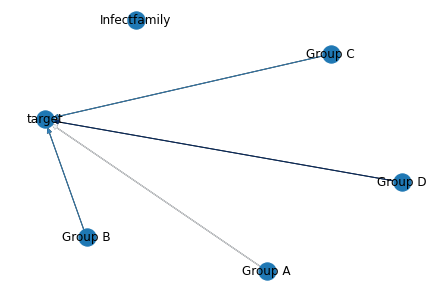

In [ ]:
print("Draw pgm explaination using networkx")
pos=nx.spring_layout(pgm_model)
nx.draw(pgm_model, pos=pos, with_labels=True)
edge_strength = {(u, v):2*np.abs(0.5-round(pe.pgm_conditional_prob(v, pgm_model, [u]), 2)) for u,v in pgm_model.edges()}

edges = nx.draw_networkx_edges(pgm_model,pos=pos,
                       edgelist = pgm_model.edges(),
                       edge_color=[edge_strength[e] for e in pgm_model.edges()],
                       edge_cmap= plt.cm.Blues,
                      #  edge_color='lightblue',
                       alpha=0.9)


In [ ]:
edge_strength

{('Group A', 'target'): 0.92,
 ('Group B', 'target'): 0.96,
 ('Group C', 'target'): 0.96,
 ('Group D', 'target'): 0.98}

Draw pgm explaination using networkx (African sample) 


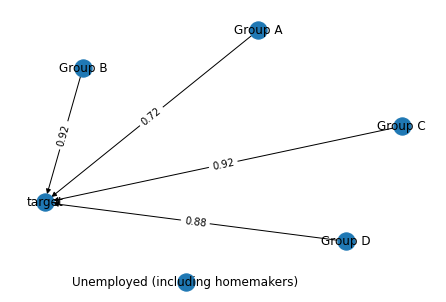

In [ ]:
import numpy as np 
print("Draw pgm explaination using networkx (African sample) ")
pos=nx.spring_layout(pgm_model)
nx.draw(pgm_model, pos=pos, with_labels=True)
edge_strength = {(u, v):2*np.abs(0.5-round(pe.pgm_conditional_prob(v, pgm_model, [u]), 2)) for u,v in pgm_model.edges()}
nx.draw_networkx_edge_labels(pgm_model, pos=pos, edge_labels=edge_strength)
plt.show()



In [ ]:

# Explainer parameters
num_samples = 100 # Number of samples to perturb the data
num_top_nodes = None # Number of top nodes to consider for the explanation. If None, all nodes are considered.
target = 1 # Target output class to explain (index of model output).
pred_threshold = 0.001 # Threshold for the prediction probability, if the class is true or not.
p_value_threshold = 0.009 # Threshold for the p-value of the feature importance.


pair_feature_names = ['Vaccineperception_CDC', 'Vaccineperception_Healthyneedittoo']
probability_df = pd.Series()
column_mapping = dict(zip(X_test.columns, range(len(X_test.columns))))
pair_features = [column_mapping[feat] for feat in pair_feature_names]
for index, row in X_test.iterrows():
    explanations = pe.explain(clf_load_model, row.to_frame().T, target=target, num_samples=num_samples,
                            pred_threshold=pred_threshold, num_top_nodes=num_top_nodes, p_threshold=p_value_threshold,
                            groups=None)
    subnodes, data, stats = explanations[0], explanations[1], explanations[2]
    if all(feat in subnodes for feat in pair_features):
        pgm_model = pe.pgm_generate(target, data, pair_features, p_value_threshold=p_value_threshold, verbose=False)
        cond_prob = pe.pgm_conditional_prob('target', pgm_model, pair_features)
        # Maybe subtract the marginal?
        # marginal_prob = pe.pgm_conditional_prob('target', pgm_model, [])
        # cond_prob = cond_prob - marginal_prob
        probability_df.loc[index] = cond_prob

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-pac

Text(0.5, 1.0, 'Probability of target class given pair of features')

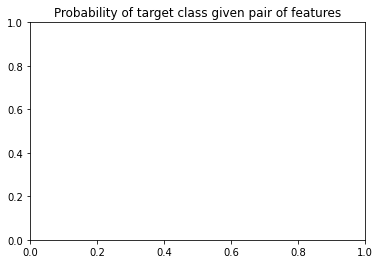

In [ ]:
probability_df = probability_df.to_frame(name='Probability')

for feat in pair_feature_names:
    probability_df[feat] = X_test.loc[probability_df.index, feat]

sns.scatterplot(x=pair_feature_names[0], y='Probability', hue=pair_feature_names[1], data=probability_df)
plt.title('Probability of target class given pair of features')

In [ ]:
probability_df = probability_df.to_frame(name='Probability')

pair_feature_names = ['Age', 'Culturalidentity_1']

for feat in pair_feature_names:
    probability_df[feat] = X_test.loc[probability_df.index, feat]

sns.scatterplot(x=pair_feature_names[0], y='Probability', hue=pair_feature_names[1], data=probability_df)
plt.title('Probability of target class given pair of features')

AttributeError: ignored

Draw pgm explaination using networkx (Gloabal Explanations)


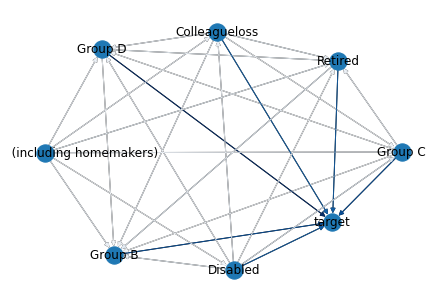

In [ ]:
####################  Latino ####################


print("Draw pgm explaination using networkx (Gloabal Explanations)")
pos=nx.spring_layout(pgm_model)
nx.draw(pgm_model, pos=pos, with_labels=True)
edge_strength = {(u, v):2*np.abs(0.5-round(pe.pgm_conditional_prob(v, pgm_model, [u]), 2)) for u,v in pgm_model.edges()}




edges = nx.draw_networkx_edges(pgm_model,pos=pos,
                       edgelist = pgm_model.edges(),
                       edge_color=[edge_strength[e] for e in pgm_model.edges()],
                       edge_cmap= plt.cm.Blues,
                      #  edge_color='lightblue',
                       alpha=0.9)



In [ ]:
edge_strength

{('Colleagueloss', 'Group B'): 0.020000000000000018,
 ('Colleagueloss', 'Group C'): 0.0,
 ('Colleagueloss', 'Group D'): 0.020000000000000018,
 ('Colleagueloss', 'Retired'): 0.040000000000000036,
 ('Colleagueloss', 'target'): 0.78,
 ('Disabled', 'Colleagueloss'): 0.020000000000000018,
 ('Disabled', 'Group B'): 0.040000000000000036,
 ('Disabled', 'Group C'): 0.06000000000000005,
 ('Disabled', 'Group D'): 0.020000000000000018,
 ('Disabled', 'Retired'): 0.0,
 ('Disabled', 'target'): 0.8,
 ('Group B', 'target'): 0.86,
 ('Group C', 'Group B'): 0.0,
 ('Group C', 'Group D'): 0.0,
 ('Group C', 'Retired'): 0.020000000000000018,
 ('Group C', 'target'): 0.86,
 ('Group D', 'Group B'): 0.0,
 ('Group D', 'Retired'): 0.040000000000000036,
 ('Group D', 'target'): 0.98,
 ('Retired', 'Group B'): 0.06000000000000005,
 ('Retired', 'target'): 0.8,
 ('Unemployed (including homemakers)', 'Colleagueloss'): 0.020000000000000018,
 ('Unemployed (including homemakers)', 'Disabled'): 0.0,
 ('Unemployed (including h

In [ ]:
for key, values in edge_strength.items():
  if values > 0.4:
    print(key, values )

('Group C', 'target') 0.86
('Group B', 'target') 0.86
('Group D', 'target') 0.98
('Colleagueloss', 'target') 0.78
('Retired', 'target') 0.8
('Disabled', 'target') 0.8
